# APLICAÇÕES II

### Manipulação de datas e horas dentro do Pandas

### Tabela com os codigos de formatação aceitos em Python/Panda e na maioria das linguagem de programação

[Códigos de formatação que o padrão C de 1989](https://docs.python.org/pt-br/3/library/datetime.html#strftime-and-strptime-format-codes)

#### Conversão de uma Timestamp  ou DataTime Pandas para um string com formato horario

In [ ]:
import pandas as pd
#https://en.wikipedia.org/wiki/List_of_tz_database_time_zones
tempo_atual = pd.Timestamp.now(tz='America/Sao_Paulo')  # Captura o tempo atual
print(tempo_atual)
# https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.strftime.html
print(tempo_atual.strftime('%Y-%m-%d %X'))
tempo_atual = tempo_atual.strftime('%X')
print(tempo_atual)


2022-11-25 17:25:36.802809-03:00
2022-11-25 17:25:36
17:25:36


### Conversão de Unix Timestamp para DataTime Pandas

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bitstamp_BTCUSD_d.csv')

df.head()

Mounted at /content/drive


,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,1.603930e+09,2020-10-29,BTCUSD,13274.73,13327.61,13184.50,13276.23,1402.78,1.861382e+07
1,1.603843e+09,2020-10-28,BTCUSD,13647.90,13864.89,12892.00,13274.73,10670.86,1.426913e+08
2,1.603757e+09,2020-10-27,BTCUSD,13066.73,13788.00,13057.09,13647.90,11242.75,1.511716e+08
3,1.603670e+09,2020-10-26,BTCUSD,13039.09,13250.00,12773.50,13066.73,5725.20,7.478865e+07
4,1.603584e+09,2020-10-25,BTCUSD,13122.73,13363.53,12903.74,13039.09,3658.60,4.784537e+07


In [ ]:
df['Unix Timestamp'] = pd.to_datetime(df['Unix Timestamp'],unit='s')
df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,2020-10-29,2020-10-29,BTCUSD,13274.73,13327.61,13184.50,13276.23,1402.78,1.861382e+07
1,2020-10-28,2020-10-28,BTCUSD,13647.90,13864.89,12892.00,13274.73,10670.86,1.426913e+08
2,2020-10-27,2020-10-27,BTCUSD,13066.73,13788.00,13057.09,13647.90,11242.75,1.511716e+08
3,2020-10-26,2020-10-26,BTCUSD,13039.09,13250.00,12773.50,13066.73,5725.20,7.478865e+07
4,2020-10-25,2020-10-25,BTCUSD,13122.73,13363.53,12903.74,13039.09,3658.60,4.784537e+07


### IMPORTANTE!!! Verifica o que é obejto datetime e o que é string

In [ ]:
df.dtypes

Unix Timestamp    datetime64[ns]
Date                      object
Symbol                    object
Open                     float64
High                     float64
Low                      float64
Close                    float64
Volume BTC               float64
Volume USD               float64
dtype: object

### A magica do tipo datetime - Differença entre dois tempos(Timedelta)

In [ ]:
# Tipo datetime
df.iloc[3,0]-df.iloc[4,0]

Timedelta('1 days 00:00:00')

In [ ]:
# Tipo string
df.iloc[3,1]-df.iloc[4,1]

TypeError: ignored

### Graficos e correlações multiplas usando Pandas



Dentro de um periodo de 90min. è pedido verificar uma enventual correlação entre a quotações do USD/BTC, BRL/BTC EUR/BTC e GBP/BTC.

Coletar os dados em JSON pelo URL https://bitpay.com/api/rates
O periodo de coleta, a quantidades e a periodicidade das requisições são a criterio do aluno.

Realizar dentro do mesmo grafico, pela biblioteca Pandas o andamento ao longo do tempo das taixas de cambio e avaliar as eventuais correlações entre eles.

In [ ]:
# Antes de usar o proprio Google Drive no Colab preciso 'montar' ele na sessão de trabalho
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Captura dos dados a partir de um URL
import pandas as pd
df = pd.read_json('https://bitpay.com/api/rates')

In [ ]:
# Busca visual pelo filtro das quotações do USD/BTC, BRL/BTC EUR/BTC e GBP/BTC.
df

,code,name,rate
0,BTC,Bitcoin,1.00
1,BCH,Bitcoin Cash,162.93
2,USD,US Dollar,15849.47
3,EUR,Eurozone Euro,15359.85
4,GBP,Pound Sterling,13427.52
...,...,...,...
178,XOF,CFA Franc BCEAO,10059601.52
179,YER,Yemeni Rial,3966330.82
180,ZAR,South African Rand,273505.55
181,ZMW,Zambian Kwacha,257715.75


In [ ]:
# NOTE:: With the browser closed, a Colabs instance will run for at most 90 minutes before your runtime is considered idle and is recycled.

import pandas as pd
import time

# Cria uma dataframe novo, vazio onde gravar os dados coletados
df2 = pd.DataFrame(columns = ['tempo', 'USD_BTC', 'BRL_BTC','EUR_BTC','GBP_BTC'],index=None)
#print(df2)

for i in range(80): #Range para definir a quantidade de comandos repetidos(5 vezes para termos uma amostra razoável)
  tempo_atual = pd.Timestamp.now(tz='America/Sao_Paulo')  # Captura o tempo atual
  tempo_atual = tempo_atual.strftime('%X') # Somente horas e minutos e seg
  df = pd.read_json('https://bitpay.com/api/rates') #Código para entrar e buscar informações do site pedido
  USD_BTC = df.iloc[2,2]
  BRL_BTC = df.iloc[38,2]
  EUR_BTC = df.iloc[3,2]
  GBP_BTC = df.iloc[4,2]
  print(tempo_atual,USD_BTC, BRL_BTC,EUR_BTC,GBP_BTC) # Isto mostra os valores na tela
  df2.loc[i] = [tempo_atual,USD_BTC, BRL_BTC,EUR_BTC,GBP_BTC]
  time.sleep(60)

df2.to_csv('/content/drive/MyDrive/rate8.csv')




17:53:26 16365.36 88343.23 15711.3 13529.67
17:54:26 16365.36 88343.23 15711.3 13529.67
17:55:26 16350.01 88260.34 15699.42 13516.98
17:56:27 16350.01 88260.34 15699.42 13516.98
17:57:27 16351.55 88268.68 15703.38 13518.25
17:58:28 16351.55 88268.68 15703.38 13518.25
17:59:28 16353.62 88279.84 15706.35 13519.96
18:00:29 16353.62 88279.84 15706.35 13519.96
18:01:29 16352.37 88273.11 15708.33 13518.93
18:02:29 16352.37 88273.11 15708.33 13518.93
18:03:29 16354.13 88282.57 15706.35 13520.38
18:04:30 16354.13 88282.57 15706.35 13520.38
18:05:30 16355.3 88288.88 15705.36 13521.35
18:06:30 16355.3 88288.88 15705.36 13521.35
18:07:30 16353.64 88279.95 15705.36 13519.98
18:08:31 16353.64 88279.95 15705.36 13519.98
18:09:31 16352.04 88271.29 15705.36 13518.65
18:10:31 16350.64 88263.76 15705.36 13517.5
18:11:31 16350.64 88263.76 15705.36 13517.5
18:12:31 16356.54 88295.61 15705.36 13522.38
18:13:31 16353.84 88281.02 15705.36 13520.14
18:14:32 16353.84 88281.02 15705.36 13520.14
18:15:32 16354.8

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# Visualiza as coletas
df_final = pd.read_csv('/content/drive/MyDrive/semana8.csv')
df_final

,Unnamed: 0,tempo,USD_BTC,BRL_BTC,EUR_BTC,GBP_BTC
0,0,10:11:07,16575.44,87355.89,16051.86,14084.65
1,1,10:13:07,16607.43,87524.47,16081.56,14111.83
2,2,10:15:09,16832.00,88708.01,16246.89,14302.66
3,3,10:17:11,16813.33,88609.60,16276.59,14286.79
4,4,10:19:11,16768.63,88374.03,16230.06,14248.81
...,...,...,...,...,...,...
195,195,16:43:37,16315.97,86929.87,15766.74,13846.40
196,196,16:45:37,16298.17,86835.03,15753.87,13831.30
197,197,16:47:38,16192.83,86273.76,15662.79,13741.90
198,198,16:49:38,16179.49,86202.71,15635.07,13730.58


### Drop ou Cancelamento de uma coluna no mesmo dataframe Pandas

In [ ]:
df_final=df_final.drop(df_final.columns[0],axis=1)
df_final

,tempo,USD_BTC,BRL_BTC,EUR_BTC,GBP_BTC
0,10:11:07,16575.44,87355.89,16051.86,14084.65
1,10:13:07,16607.43,87524.47,16081.56,14111.83
2,10:15:09,16832.00,88708.01,16246.89,14302.66
3,10:17:11,16813.33,88609.60,16276.59,14286.79
4,10:19:11,16768.63,88374.03,16230.06,14248.81
...,...,...,...,...,...
195,16:43:37,16315.97,86929.87,15766.74,13846.40
196,16:45:37,16298.17,86835.03,15753.87,13831.30
197,16:47:38,16192.83,86273.76,15662.79,13741.90
198,16:49:38,16179.49,86202.71,15635.07,13730.58


In [ ]:
df_final.corr()

,USD_BTC,BRL_BTC,EUR_BTC,GBP_BTC
USD_BTC,1.000000,0.961218,0.993533,0.981544
BRL_BTC,0.961218,1.000000,0.948474,0.973516
EUR_BTC,0.993533,0.948474,1.000000,0.978604
GBP_BTC,0.981544,0.973516,0.978604,1.000000


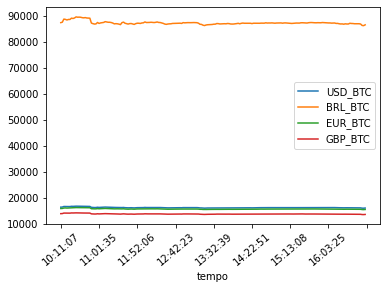

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
df_final.plot(x ="tempo",y=["USD_BTC","BRL_BTC","EUR_BTC","GBP_BTC"])
plt.xticks(rotation=40)

plt.show()


## ATIVIDADE

Fazer um grafico com subplot que inclua em cada quadrante uma combinação de para de taixa de cambio, para exemplo USD_BTC com BRL_BTC, etc....